In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 16
from scipy import fftpack
from scipy.ndimage import gaussian_filter
from scipy import signal
import scipy
import warnings
warnings.filterwarnings('ignore')

In [3]:
def MyHanningTaper(sig,ptap):
    #Take a signal and taper its edges to zero 
    #with ptap being the percentage of the signal over which the taper will be applied
    
    nt=np.size(sig)
    tlen=int(nt*ptap/100.)
    
    tap1=np.hanning(2*tlen)
    
    tap2=np.ones_like(sig)
    tap2[:tlen]=tap1[:tlen]
    tap2[-tlen:]=tap1[-tlen:]
    sig2=tap2*sig
    
    return sig2

In [4]:
def circle(x, y):
    return x**2+y**2

In [5]:
x = np.linspace(0,8*np.pi,10000)
pump = 1.5*np.sin(x)
pump_tap1 = MyHanningTaper(pump,30)
pump_fin = np.pad(pump_tap1, 100)

xx = np.linspace(0,2*np.pi,10000)
probe = (1/2)*np.sin(xx)
probe_tap1 = MyHanningTaper(probe,30)
probe_fin = np.pad(probe_tap1, 100)

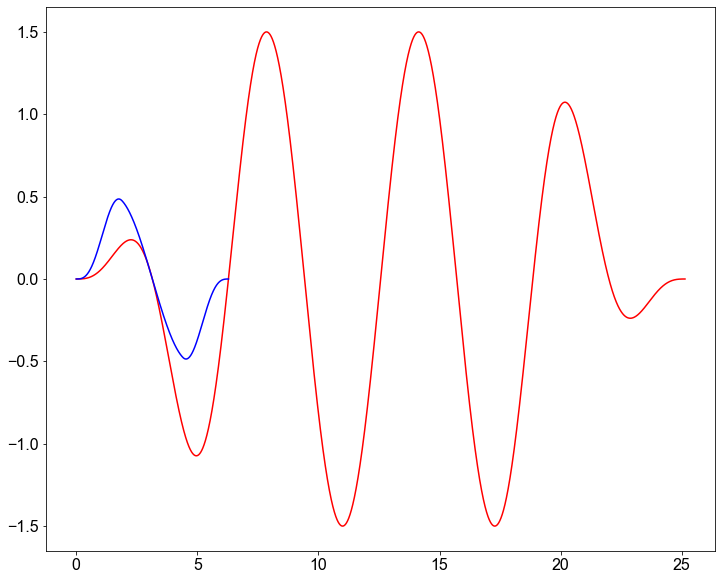

In [6]:
plt.figure(figsize=(12,10))
plt.plot(x, pump_tap1, color='r')
plt.plot(xx, probe_tap1, color='b')
plt.show()

In [7]:
print(np.linspace(0, 10, 1000))

[ 0.          0.01001001  0.02002002  0.03003003  0.04004004  0.05005005
  0.06006006  0.07007007  0.08008008  0.09009009  0.1001001   0.11011011
  0.12012012  0.13013013  0.14014014  0.15015015  0.16016016  0.17017017
  0.18018018  0.19019019  0.2002002   0.21021021  0.22022022  0.23023023
  0.24024024  0.25025025  0.26026026  0.27027027  0.28028028  0.29029029
  0.3003003   0.31031031  0.32032032  0.33033033  0.34034034  0.35035035
  0.36036036  0.37037037  0.38038038  0.39039039  0.4004004   0.41041041
  0.42042042  0.43043043  0.44044044  0.45045045  0.46046046  0.47047047
  0.48048048  0.49049049  0.5005005   0.51051051  0.52052052  0.53053053
  0.54054054  0.55055055  0.56056056  0.57057057  0.58058058  0.59059059
  0.6006006   0.61061061  0.62062062  0.63063063  0.64064064  0.65065065
  0.66066066  0.67067067  0.68068068  0.69069069  0.7007007   0.71071071
  0.72072072  0.73073073  0.74074074  0.75075075  0.76076076  0.77077077
  0.78078078  0.79079079  0.8008008   0.81081081  0

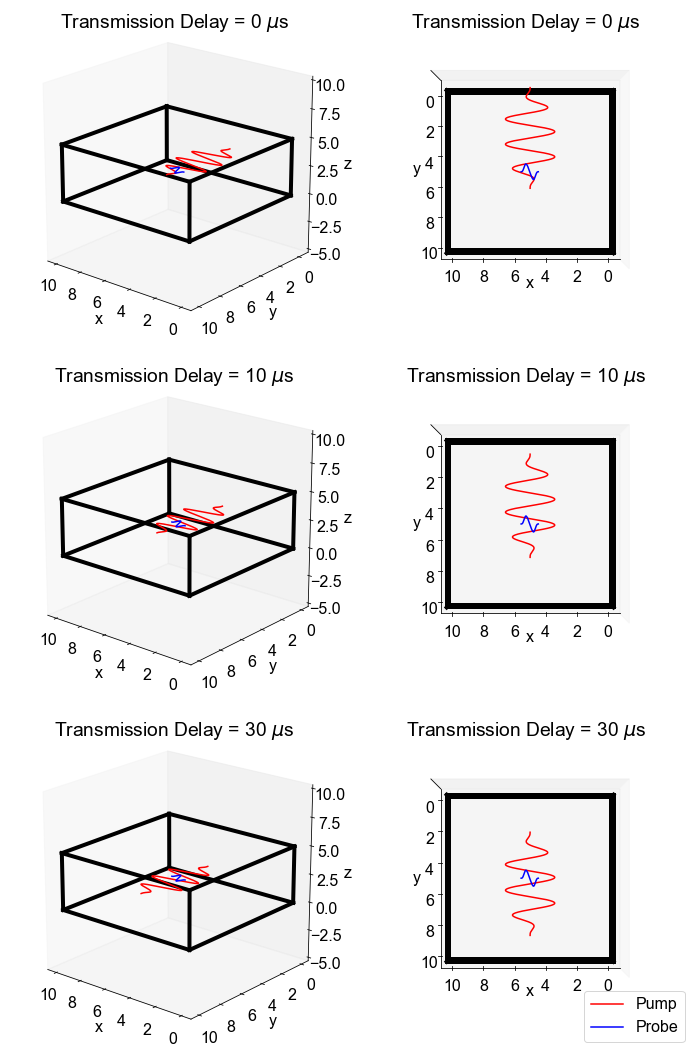

In [11]:
fig = plt.figure(figsize=(10,15))

#### TOP ####
ax1 = fig.add_subplot(321, projection='3d')
# ax.set_axis_off()
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.plot(np.linspace(0, 10, 1000), np.ones_like(np.linspace(0, 10, 1000))*10, 0, '-k', linewidth=4)
ax1.plot(np.linspace(0, 10, 1000), np.ones_like(np.linspace(0, 10, 1000))*0, 0, '-k', linewidth=4)
ax1.plot(np.linspace(0, 10, 1000), np.ones_like(np.linspace(0, 10, 1000))*10, 5, '-k', linewidth=4)
ax1.plot(np.linspace(0, 10, 1000), np.ones_like(np.linspace(0, 10, 1000))*0, 5, '-k', linewidth=4)

ax1.plot(np.ones_like(np.linspace(0, 10, 1000))*10, np.linspace(0, 10, 1000), 0, '-k', linewidth=4)
ax1.plot(np.ones_like(np.linspace(0, 10, 1000))*0, np.linspace(0, 10, 1000), 0, '-k', linewidth=4)
ax1.plot(np.ones_like(np.linspace(0, 10, 1000))*10, np.linspace(0, 10, 1000), 5, '-k', linewidth=4)
ax1.plot(np.ones_like(np.linspace(0, 10, 1000))*0, np.linspace(0, 10, 1000), 5, '-k', linewidth=4)


ax1.plot(np.ones_like(np.linspace(0, 5, 1000))*0 , np.ones_like(np.linspace(0, 5, 1000))*10, np.linspace(0, 5, 1000),
         '-k', linewidth=4)
ax1.plot(np.ones_like(np.linspace(0, 5, 1000))*10 , np.ones_like(np.linspace(0, 5, 1000))*10, np.linspace(0, 5, 1000),
         '-k', linewidth=4)
ax1.plot(np.ones_like(np.linspace(0, 5, 1000))*10 , np.ones_like(np.linspace(0, 5, 1000))*0, np.linspace(0, 5, 1000),
         '-k', linewidth=4)
ax1.plot(np.ones_like(np.linspace(0, 5, 1000))*0 , np.ones_like(np.linspace(0, 5, 1000))*0, np.linspace(0, 5, 1000),
         '-k', linewidth=4)


ax1.plot(pump_tap1+5, x/4-0.25,  np.ones_like(x)*2.5, color='r', label='Pump')
ax1.plot(xx/6+4.5,probe_tap1+5, np.ones_like(xx)*2.5, color='b', label='Probe')
ax1.set_zlim(-5, 10)
# ax1.legend(loc='lower right')
ax1.set(title='Transmission Delay = 0 $\mu$s')
# ax.plot(xs=pump, ys=x, zs=0, zdir='x', color='r', linewidth=20)
ax1.view_init(20, 130)
ax1.grid(b=None)

ax2 = fig.add_subplot(322, projection='3d')
ax2.set_zticks([])
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.plot(np.linspace(0, 10, 1000), np.ones_like(np.linspace(0, 10, 1000))*10, 0, '-k', linewidth=4)
ax2.plot(np.linspace(0, 10, 1000), np.ones_like(np.linspace(0, 10, 1000))*0, 0, '-k', linewidth=4)
ax2.plot(np.linspace(0, 10, 1000), np.ones_like(np.linspace(0, 10, 1000))*10, 5, '-k', linewidth=4)
ax2.plot(np.linspace(0, 10, 1000), np.ones_like(np.linspace(0, 10, 1000))*0, 5, '-k', linewidth=4)

ax2.plot(np.ones_like(np.linspace(0, 10, 1000))*10, np.linspace(0, 10, 1000), 0, '-k', linewidth=4)
ax2.plot(np.ones_like(np.linspace(0, 10, 1000))*0, np.linspace(0, 10, 1000), 0, '-k', linewidth=4)
ax2.plot(np.ones_like(np.linspace(0, 10, 1000))*10, np.linspace(0, 10, 1000), 5, '-k', linewidth=4)
ax2.plot(np.ones_like(np.linspace(0, 10, 1000))*0, np.linspace(0, 10, 1000), 5, '-k', linewidth=4)


ax2.plot(np.ones_like(np.linspace(0, 5, 1000))*0 , np.ones_like(np.linspace(0, 5, 1000))*10, np.linspace(0, 5, 1000),
         '-k', linewidth=4)
ax2.plot(np.ones_like(np.linspace(0, 5, 1000))*10 , np.ones_like(np.linspace(0, 5, 1000))*10, np.linspace(0, 5, 1000),
         '-k', linewidth=4)
ax2.plot(np.ones_like(np.linspace(0, 5, 1000))*10 , np.ones_like(np.linspace(0, 5, 1000))*0, np.linspace(0, 5, 1000),
         '-k', linewidth=4)
ax2.plot(np.ones_like(np.linspace(0, 5, 1000))*0 , np.ones_like(np.linspace(0, 5, 1000))*0, np.linspace(0, 5, 1000),
         '-k', linewidth=4)


ax2.plot(pump_tap1+5, x/4-0.25,  np.ones_like(x)*2.5, color='r', label='Pump')
ax2.plot(xx/6+4.5,probe_tap1+5, np.ones_like(xx)*2.5, color='b', label='Probe')
ax2.set_zlim(-5, 10)
# ax2.legend(loc='lower right')
ax2.set(title='Transmission Delay = 0 $\mu$s')
# x.plot(xs=pump, ys=x, zs=0, zdir='x', color='r', linewidth=20)
ax2.view_init(90, 90)
ax2.grid(b=None)

#### Middle ####

ax3 = fig.add_subplot(323, projection='3d')
# ax.set_axis_off()
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('z')
ax3.plot(np.linspace(0, 10, 1000), np.ones_like(np.linspace(0, 10, 1000))*10, 0, '-k', linewidth=4)
ax3.plot(np.linspace(0, 10, 1000), np.ones_like(np.linspace(0, 10, 1000))*0, 0, '-k', linewidth=4)
ax3.plot(np.linspace(0, 10, 1000), np.ones_like(np.linspace(0, 10, 1000))*10, 5, '-k', linewidth=4)
ax3.plot(np.linspace(0, 10, 1000), np.ones_like(np.linspace(0, 10, 1000))*0, 5, '-k', linewidth=4)

ax3.plot(np.ones_like(np.linspace(0, 10, 1000))*10, np.linspace(0, 10, 1000), 0, '-k', linewidth=4)
ax3.plot(np.ones_like(np.linspace(0, 10, 1000))*0, np.linspace(0, 10, 1000), 0, '-k', linewidth=4)
ax3.plot(np.ones_like(np.linspace(0, 10, 1000))*10, np.linspace(0, 10, 1000), 5, '-k', linewidth=4)
ax3.plot(np.ones_like(np.linspace(0, 10, 1000))*0, np.linspace(0, 10, 1000), 5, '-k', linewidth=4)


ax3.plot(np.ones_like(np.linspace(0, 5, 1000))*0 , np.ones_like(np.linspace(0, 5, 1000))*10, np.linspace(0, 5, 1000),
         '-k', linewidth=4)
ax3.plot(np.ones_like(np.linspace(0, 5, 1000))*10 , np.ones_like(np.linspace(0, 5, 1000))*10, np.linspace(0, 5, 1000),
         '-k', linewidth=4)
ax3.plot(np.ones_like(np.linspace(0, 5, 1000))*10 , np.ones_like(np.linspace(0, 5, 1000))*0, np.linspace(0, 5, 1000),
         '-k', linewidth=4)
ax3.plot(np.ones_like(np.linspace(0, 5, 1000))*0 , np.ones_like(np.linspace(0, 5, 1000))*0, np.linspace(0, 5, 1000),
         '-k', linewidth=4)


ax3.plot(pump_tap1+5, x/4+0.75,  np.ones_like(x)*2.5, color='r', label='Pump')
ax3.plot(xx/6+4.5,probe_tap1+5, np.ones_like(xx)*2.5, color='b', label='Probe')
ax3.set_zlim(-5, 10)
# ax3.legend(loc='lower right')
ax3.set(title='Transmission Delay = 10 $\mu$s')
# ax.plot(xs=pump, ys=x, zs=0, zdir='x', color='r', linewidth=20)
ax3.view_init(20, 130)
ax3.grid(b=None)

ax4 = fig.add_subplot(324, projection='3d')
# ax.set_axis_off()
ax4.set_zticks([])
ax4.set_xlabel('x')
ax4.set_ylabel('y')

ax4.plot(np.linspace(0, 10, 1000), np.ones_like(np.linspace(0, 10, 1000))*10, 0, '-k', linewidth=4)
ax4.plot(np.linspace(0, 10, 1000), np.ones_like(np.linspace(0, 10, 1000))*0, 0, '-k', linewidth=4)
ax4.plot(np.linspace(0, 10, 1000), np.ones_like(np.linspace(0, 10, 1000))*10, 5, '-k', linewidth=4)
ax4.plot(np.linspace(0, 10, 1000), np.ones_like(np.linspace(0, 10, 1000))*0, 5, '-k', linewidth=4)

ax4.plot(np.ones_like(np.linspace(0, 10, 1000))*10, np.linspace(0, 10, 1000), 0, '-k', linewidth=4)
ax4.plot(np.ones_like(np.linspace(0, 10, 1000))*0, np.linspace(0, 10, 1000), 0, '-k', linewidth=4)
ax4.plot(np.ones_like(np.linspace(0, 10, 1000))*10, np.linspace(0, 10, 1000), 5, '-k', linewidth=4)
ax4.plot(np.ones_like(np.linspace(0, 10, 1000))*0, np.linspace(0, 10, 1000), 5, '-k', linewidth=4)


ax4.plot(np.ones_like(np.linspace(0, 5, 1000))*0 , np.ones_like(np.linspace(0, 5, 1000))*10, np.linspace(0, 5, 1000),
         '-k', linewidth=4)
ax4.plot(np.ones_like(np.linspace(0, 5, 1000))*10 , np.ones_like(np.linspace(0, 5, 1000))*10, np.linspace(0, 5, 1000),
         '-k', linewidth=4)
ax4.plot(np.ones_like(np.linspace(0, 5, 1000))*10 , np.ones_like(np.linspace(0, 5, 1000))*0, np.linspace(0, 5, 1000),
         '-k', linewidth=4)
ax4.plot(np.ones_like(np.linspace(0, 5, 1000))*0 , np.ones_like(np.linspace(0, 5, 1000))*0, np.linspace(0, 5, 1000),
         '-k', linewidth=4)


ax4.plot(pump_tap1+5, x/4+0.75,  np.ones_like(x)*2.5, color='r', label='Pump')
ax4.plot(xx/6+4.5,probe_tap1+5, np.ones_like(xx)*2.5, color='b', label='Probe')
ax4.set_zlim(-5, 10)
# ax4.legend(loc='lower right')
ax4.set(title='Transmission Delay = 10 $\mu$s')
# .plot(xs=pump, ys=x, zs=0, zdir='x', color='r', linewidth=20)
ax4.view_init(90, 90)
ax4.grid(b=None)

#### BOTTOM ####
ax5 = fig.add_subplot(325, projection='3d')
# ax.set_axis_off()
ax5.set_xlabel('x')
ax5.set_ylabel('y')
ax5.set_zlabel('z')
ax5.plot(np.linspace(0, 10, 1000), np.ones_like(np.linspace(0, 10, 1000))*10, 0, '-k', linewidth=4)
ax5.plot(np.linspace(0, 10, 1000), np.ones_like(np.linspace(0, 10, 1000))*0, 0, '-k', linewidth=4)
ax5.plot(np.linspace(0, 10, 1000), np.ones_like(np.linspace(0, 10, 1000))*10, 5, '-k', linewidth=4)
ax5.plot(np.linspace(0, 10, 1000), np.ones_like(np.linspace(0, 10, 1000))*0, 5, '-k', linewidth=4)

ax5.plot(np.ones_like(np.linspace(0, 10, 1000))*10, np.linspace(0, 10, 1000), 0, '-k', linewidth=4)
ax5.plot(np.ones_like(np.linspace(0, 10, 1000))*0, np.linspace(0, 10, 1000), 0, '-k', linewidth=4)
ax5.plot(np.ones_like(np.linspace(0, 10, 1000))*10, np.linspace(0, 10, 1000), 5, '-k', linewidth=4)
ax5.plot(np.ones_like(np.linspace(0, 10, 1000))*0, np.linspace(0, 10, 1000), 5, '-k', linewidth=4)


ax5.plot(np.ones_like(np.linspace(0, 5, 1000))*0 , np.ones_like(np.linspace(0, 5, 1000))*10, np.linspace(0, 5, 1000),
         '-k', linewidth=4)
ax5.plot(np.ones_like(np.linspace(0, 5, 1000))*10 , np.ones_like(np.linspace(0, 5, 1000))*10, np.linspace(0, 5, 1000),
         '-k', linewidth=4)
ax5.plot(np.ones_like(np.linspace(0, 5, 1000))*10 , np.ones_like(np.linspace(0, 5, 1000))*0, np.linspace(0, 5, 1000),
         '-k', linewidth=4)
ax5.plot(np.ones_like(np.linspace(0, 5, 1000))*0 , np.ones_like(np.linspace(0, 5, 1000))*0, np.linspace(0, 5, 1000),
         '-k', linewidth=4)


ax5.plot(pump_tap1+5, x/4+2.2,  np.ones_like(x)*2.5, color='r', label='Pump')
ax5.plot(xx/6+4.5,probe_tap1+5, np.ones_like(xx)*2.5, color='b', label='Probe')
ax5.set_zlim(-5, 10)
# ax5.legend(loc='lower right')
ax5.set(title='Transmission Delay = 30 $\mu$s')
# ax.plot(xs=pump, ys=x, zs=0, zdir='x', color='r', linewidth=20)
ax5.view_init(20, 130)
ax5.grid(b=None)

ax6 = fig.add_subplot(326, projection='3d')
# ax.set_axis_off()
ax6.set_zticks([])
ax6.set_xlabel('x')
ax6.set_ylabel('y')
ax6.plot(np.linspace(0, 10, 1000), np.ones_like(np.linspace(0, 10, 1000))*10, 0, '-k', linewidth=4)
ax6.plot(np.linspace(0, 10, 1000), np.ones_like(np.linspace(0, 10, 1000))*0, 0, '-k', linewidth=4)
ax6.plot(np.linspace(0, 10, 1000), np.ones_like(np.linspace(0, 10, 1000))*10, 5, '-k', linewidth=4)
ax6.plot(np.linspace(0, 10, 1000), np.ones_like(np.linspace(0, 10, 1000))*0, 5, '-k', linewidth=4)

ax6.plot(np.ones_like(np.linspace(0, 10, 1000))*10, np.linspace(0, 10, 1000), 0, '-k', linewidth=4)
ax6.plot(np.ones_like(np.linspace(0, 10, 1000))*0, np.linspace(0, 10, 1000), 0, '-k', linewidth=4)
ax6.plot(np.ones_like(np.linspace(0, 10, 1000))*10, np.linspace(0, 10, 1000), 5, '-k', linewidth=4)
ax6.plot(np.ones_like(np.linspace(0, 10, 1000))*0, np.linspace(0, 10, 1000), 5, '-k', linewidth=4)


ax6.plot(np.ones_like(np.linspace(0, 5, 1000))*0 , np.ones_like(np.linspace(0, 5, 1000))*10, np.linspace(0, 5, 1000),
         '-k', linewidth=4)
ax6.plot(np.ones_like(np.linspace(0, 5, 1000))*10 , np.ones_like(np.linspace(0, 5, 1000))*10, np.linspace(0, 5, 1000),
      '-k', linewidth=4)
ax6.plot(np.ones_like(np.linspace(0, 5, 1000))*10 , np.ones_like(np.linspace(0, 5, 1000))*0, np.linspace(0, 5, 1000),
         '-k', linewidth=4)
ax6.plot(np.ones_like(np.linspace(0, 5, 1000))*0 , np.ones_like(np.linspace(0, 5, 1000))*0, np.linspace(0, 5, 1000),
         '-k', linewidth=4)


ax6.plot(pump_tap1+5, x/4+2.2,  np.ones_like(x)*2.5, color='r', label='Pump')
ax6.plot(xx/6+4.5,probe_tap1+5, np.ones_like(xx)*2.5, color='b', label='Probe')
ax6.set_zlim(-5, 10)
ax6.legend(loc='lower right')
ax6.set(title='Transmission Delay = 30 $\mu$s')
# .plot(xs=pump, ys=x, zs=0, zdir='x', color='r', linewidth=20)
ax6.view_init(90, 90)
ax6.grid(b=None)
#### GENERAL ####
plt.tight_layout()
plt.savefig('c:/users/Jacob/Nonlinearity/Images/Set-up/Transmission-delays_rev2.pdf', dpi=300, bbox_inches='tight',
           format='pdf')
plt.show()